In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [36]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
print("Number of images in training set {}".format(x_train.shape))
print("Number of labels in training set {}".format(y_train.shape))
print("Number of images in test set {}".format(x_test.shape))
print("Number of labels in test set {}".format(y_train.shape))

Number of images in training set (60000, 28, 28)
Number of labels in training set (60000,)
Number of images in test set (10000, 28, 28)
Number of labels in test set (60000,)


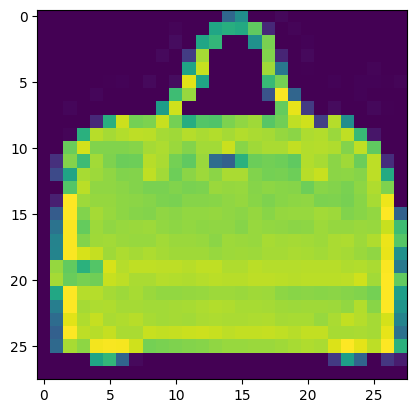

In [38]:
plt.figure()
plt.imshow(np.squeeze(x_train[220]))

In [39]:
y_train[220]

8

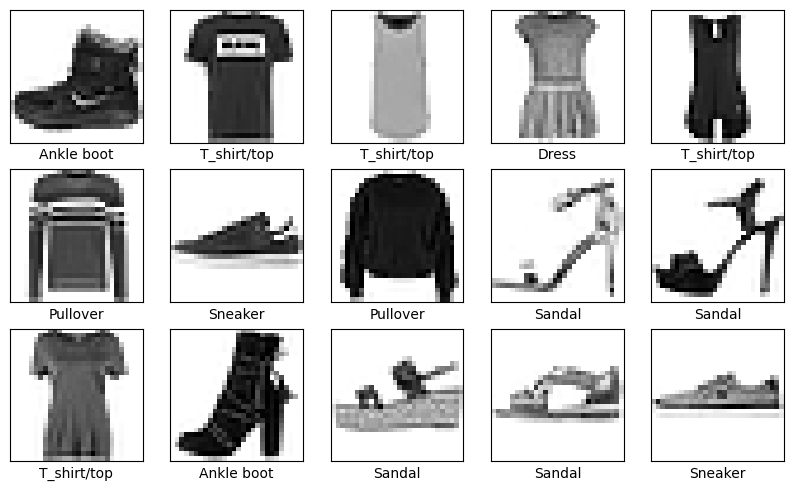

In [40]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]] if y_train[i] < len(class_names) else "Unknown")
plt.show()

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [42]:
cnn_model = Sequential()

In [43]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [44]:
cnn_model.add(MaxPooling2D(pool_size= (2, 2)))

In [45]:
cnn_model.add(Flatten())

In [46]:
cnn_model.add(Dense(32, activation = 'relu'))

In [47]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [48]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,066 (66.66 KB)

 Trainable params: 17,066 (66.66 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics= ['accuracy'])

In [50]:
history = cnn_model.fit(x_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4278 - loss: 8.4913 - val_accuracy: 0.6381 - val_loss: 1.1849
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6658 - loss: 1.0879 - val_accuracy: 0.7041 - val_loss: 0.9749
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7210 - loss: 0.8696 - val_accuracy: 0.7279 - val_loss: 0.8387
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7482 - loss: 0.7595 - val_accuracy: 0.7515 - val_loss: 0.7490
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7754 - loss: 0.6605 - val_accuracy: 0.7764 - val_loss: 0.6719


In [51]:
cnn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7794 - loss: 0.6680


[0.6718698740005493, 0.7764000296592712]

In [52]:
probability_model = tf.keras.Sequential([cnn_model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


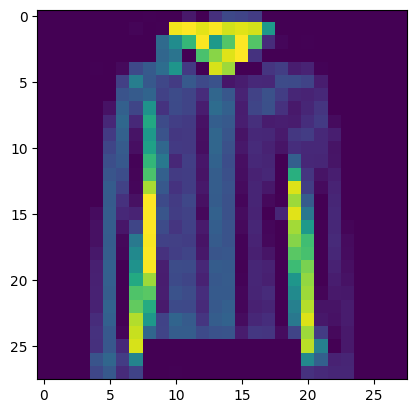

In [53]:
img = x_test[6]
plt.imshow(img)

In [69]:
y_predict = class_names[np.argmax(predictions[6])]
y_predict

'Coat'

In [70]:
y_actual = class_names[y_test[6]]
y_actual

'Coat'

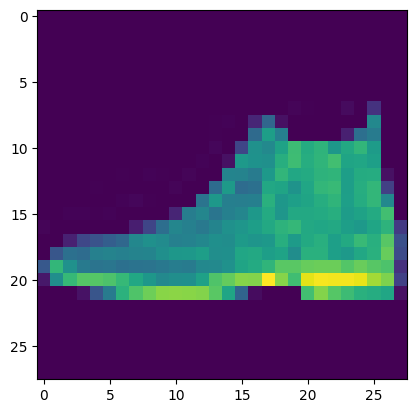

In [56]:
img = x_test[0]
plt.imshow(img)

In [60]:
y_predict = class_names[np.argmax(predictions[0])]
y_predict


'Ankle boot'

In [62]:
y_actual = class_names[y_test[0]]
y_actual

'Ankle boot'

In [63]:
test_loss, test_accuracy = cnn_model.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7919 - loss: 0.6151


In [64]:
print(test_accuracy)

0.7913500070571899


In [65]:
print(test_loss)

0.6134859323501587


In [66]:
history.history??

Type:        dict
String form: {'accuracy': [0.5466166734695435, 0.6833833456039429, 0.7303333282470703, 0.7544000148773193, 0.7751500010490417], 'loss': [3.541233539581299, 1.0232640504837036, 0.8377304673194885, 0.7362618446350098, 0.6604897975921631], 'val_accuracy': [0.6381000280380249, 0.7041000127792358, 0.7279000282287598, 0.7515000104904175, 0.7764000296592712], 'val_loss': [1.1849318742752075, 0.9748519659042358, 0.8387466073036194, 0.7490131258964539, 0.6718697547912598]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [67]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

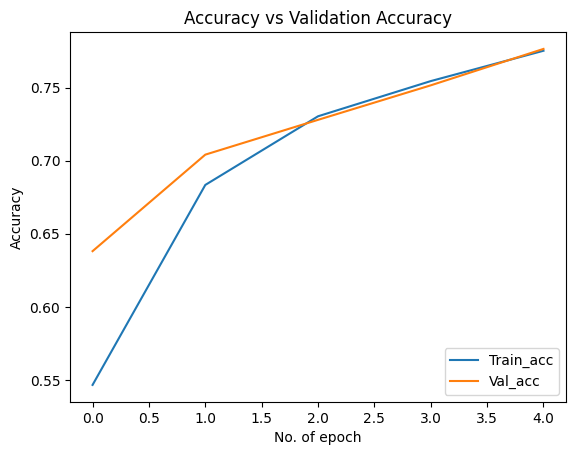

In [68]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()